In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


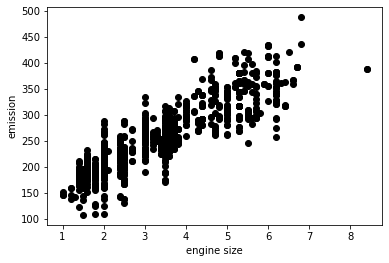

In [5]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'black' )
plt.xlabel('engine size')
plt.ylabel('emission')
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [8]:
#polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

model = linear_model.LinearRegression()
train_y_ = model.fit(train_x_poly , train_y)

# coefficients
print('coefficients :', model.coef_)
print('intercept : ',  model.intercept_)


coefficients : [[ 0.         48.88069564 -1.27966321]]
intercept :  [109.87080321]


Text(0, 0.5, 'emissions')

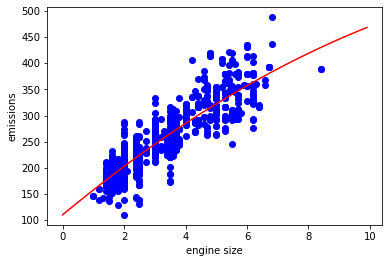

In [10]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'blue')
x = np.arange(0.0 , 10.0 , 0.1)
y = model.intercept_ + model.coef_[0][0] + model.coef_[0][1]*x + model.coef_[0][2]*np.power(x , 2)
plt.plot(x , y , c = 'red')
plt.xlabel('engine size')
plt.ylabel('emissions')

In [11]:
# evaluation 
from sklearn .metrics import r2_score
test_x_poly = poly.transform(test_x)
test_y_ = model.predict(test_x_poly)

print('mean absolute error : %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('residual sum of squares mse : %.2f'% np.mean((test_y_ - test_y)**2))
print('r2 score : %.2f '% r2_score(test_y , test_y_))

mean absolute error : 23.59
residual sum of squares mse : 972.15
r2 score : 0.75 
